In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt

df = pd.read_csv('preprocessedInsuranceDoodnauth.csv')

print(df.isnull().sum()) #data was processed in the last lab (lab 02)

labelencoder = LabelEncoder()
insurance_df['sex'] = labelencoder.fit_transform(insurance_df['sex'])
insurance_df['smoker'] = labelencoder.fit_transform(insurance_df['smoker'])
insurance_df['region'] = labelencoder.fit_transform(insurance_df['region'])


Unnamed: 0    0
age           0
sex           0
bmi           0
children      0
smoker        0
region        0
charges       0
dtype: int64


In [15]:
# 1.2 Split the preprocessed dataset into training set and testing set

# Use 80% of samples as the training set and 20% of samples as the testing set

insurance_fea = df.drop('charges', axis=1).values
insurance_price = df['charges'].values
insurance_price = insurance_price / np.max(insurance_price)

X_train,X_test,y_train,y_test = train_test_split(insurance_fea,
                                                 insurance_price,
                                                 test_size=0.2,
                                                 random_state=42)

print(X_train.shape)
print(X_test.shape)

normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

(1070, 7)
(268, 7)


In [17]:
# 1.3 Train the linear regression model

# Here, we use the training set to learn the model parameter

# Then, we compute MAE, MSE, and RMSE to see how well the learned model fit the training set.

lr = LinearRegression()

lr.fit(X_train, y_train)

print('bias is ' + str(lr.intercept_))
print('coefficients are ' + str(lr.coef_))

y_train_pred = lr.predict(X_train) #model parameter w

mae = mean_absolute_error(y_train_pred,y_train)
mse = mean_squared_error(y_train_pred,y_train)
rmse = np.sqrt(mse)

print('prediction for training set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))


bias is 0.19512367061019303
coefficients are [ 3.21129571e-03  5.78315012e-02 -7.48113826e-05  3.24501224e-02
  8.11978026e-03  1.52472215e-01 -4.80667539e-03]
prediction for training set:
MAE is: 0.06708954863253438
MSE is: 0.009488377087984463
RMSE is: 0.09740830091929775


prediction for testing set:
MAE is: 0.06706040782790473
MSE is: 0.008622876428942352
RMSE is: 0.09285944447896699


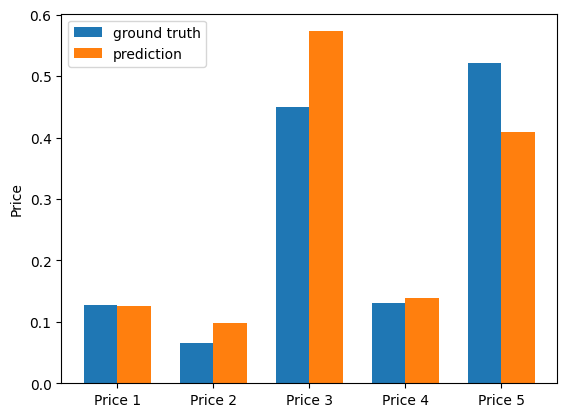

In [14]:
# 1.4 Evaluate the linear regression model

# After obtaining the model parameter, the linear regression model is determined. 
# Then, we need to evaluate this model to see how well this model generaizes on the testing set.

#4. evaluate the model
y_test_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test_pred,y_test)
mse = mean_squared_error(y_test_pred,y_test)
rmse = np.sqrt(mse)

print('prediction for testing set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))


labels = ['Price 1', 'Price 2', 'Price 3', 'Price 4', 'Price 5']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_test[0:5], width, label='ground truth')
rects2 = ax.bar(x + width/2, y_test_pred[0:5], width, label='prediction')

ax.set_ylabel('Price')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

In [32]:
# 1.5 Use the ridge regression model to do prediction

# 1.5.1 Compare its performance on the testing set with that of the standard linear regression model
# train the ridge model (lambda = 1)

print('-----------------------------------------------------')
print('lambda = 1')
clf = Ridge(alpha = 1)

clf.fit(X_train, y_train)

print("bias is "+str(clf.intercept_))
print("coefficients  is "+str(clf.coef_))

new_y_test_pred = clf.predict(X_test) #predict with testing set

mae = mean_absolute_error(new_y_test_pred,y_test)
mse = mean_squared_error(new_y_test_pred,y_test)
rmse = np.sqrt(mse)

print('prediction for training set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))

print('-----------------------------------------------------')

print('lambda = 2')

# 1.5.2 Use different lambdas to see how it affects the performance of the ridge regression model on the testing set

# lambda = 2

clf = Ridge(alpha = 2)

clf.fit(X_train, y_train)

print("bias is "+str(clf.intercept_))
print("coefficients  is "+str(clf.coef_))

new_y_test_pred = clf.predict(X_test) #predict with testing set

mae = mean_absolute_error(new_y_test_pred,y_test)
mse = mean_squared_error(new_y_test_pred,y_test)
rmse = np.sqrt(mse)

print('prediction for training set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))

print('-----------------------------------------------------')
print('lambda = 0.5')

# lambda = 0.5

clf = Ridge(alpha = 0.5)

clf.fit(X_train, y_train)

print("bias is "+str(clf.intercept_))
print("coefficients  is "+str(clf.coef_))

new_y_test_pred = clf.predict(X_test) #predict with testing set

mae = mean_absolute_error(new_y_test_pred,y_test)
mse = mean_squared_error(new_y_test_pred,y_test)
rmse = np.sqrt(mse)

print('prediction for training set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))

print('-----------------------------------------------------')
print('lambda = 3')

# lambda = 3

clf = Ridge(alpha = 3)

clf.fit(X_train, y_train)

print("bias is "+str(clf.intercept_))
print("coefficients  is "+str(clf.coef_))

new_y_test_pred = clf.predict(X_test) #predict with testing set

mae = mean_absolute_error(new_y_test_pred,y_test)
mse = mean_squared_error(new_y_test_pred,y_test)
rmse = np.sqrt(mse)

print('prediction for training set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))

print('-----------------------------------------------------')
print('lambda = 0.1')

# lambda = 0.1

clf = Ridge(alpha = 0.1)

clf.fit(X_train, y_train)

print("bias is "+str(clf.intercept_))
print("coefficients  is "+str(clf.coef_))

new_y_test_pred = clf.predict(X_test) #predict with testing set

mae = mean_absolute_error(new_y_test_pred,y_test)
mse = mean_squared_error(new_y_test_pred,y_test)
rmse = np.sqrt(mse)

print('prediction for training set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))

-----------------------------------------------------
lambda = 1
bias is 0.19512367061019303
coefficients  is [ 3.20957661e-03  5.77729173e-02 -6.43622567e-05  3.24246348e-02
  8.11765351e-03  1.52326136e-01 -4.79823057e-03]
prediction for training set:
MAE is: 0.06708691834902256
MSE is: 0.008624621222064928
RMSE is: 0.09286883881079233
-----------------------------------------------------
lambda = 2
bias is 0.19512367061019303
coefficients  is [ 3.20785815e-03  5.77144531e-02 -5.39523588e-05  3.23991857e-02
  8.11552011e-03  1.52180338e-01 -4.78980797e-03]
prediction for training set:
MAE is: 0.06711337236924136
MSE is: 0.00862641578478291
RMSE is: 0.09287850012130315
-----------------------------------------------------
lambda = 0.5
bias is 0.19512367061019303
coefficients  is [ 3.21043608e-03  5.78021942e-02 -6.95819057e-05  3.24373738e-02
  8.11871772e-03  1.52399140e-01 -4.80245019e-03]
prediction for training set:
MAE is: 0.06707367016230678
MSE is: 0.008623742585609268
RMSE is:

In [ ]:
# By utilizing the Ridge regression model (with lambdas = 1, 2, 0.5, 3, and 0.1), it was seen that the linear regression model
# proved slightly more accurate compared to the Ridge regression. With that being said, the values were still extremely close.
# Within the Ridge regression, as lambda decreased, the MAE, MSE, and RMSE, also decreased.
# This makes sense has the Ridge model only adds a penalty parameter (w^2) to minimize the model complexity and thus, overfitting. 
# This was seen in the MAE, MSE, and RMSE, where the performance for the linear regression model denoted a lower number on the
# order of the millionths (1 x 10^-6) for the MAE and MSE, and on the hundred-thousandths (1 x 10^-5) for the RMSE.
